In [138]:
import pandas as pd
import numpy as np
import matplotlib as plt
from ipysankeywidget import SankeyWidget
import seaborn as sns


%matplotlib inline


Our dataset comes from the freely available [Animal Care and Control Adopted Animals](https://data.bloomington.in.gov/dataset/adopted-animals) dataset published by the city of Bloomington, IN.

In [45]:
dataurl = 'https://data.bloomington.in.gov/dataset/94d3f457-57b5-45be-bee0-a0106f59b7ed/resource/8854ce02-e8f5-44b9-b85f-17f002a7d023/download/8854ce02-e8f5-44b9-b85f-17f002a7d023.csv'
df = pd.read_csv(dataurl)
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,NaN,Stray,NaN,Died in care,0,0,0
4,31469,2013-03-26 00:00:00,Incompatible,0,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,2013-03-30 00:00:00,Adoption,0.0,2017-05-08 00:00:00,Incompatible,NaN,Died in care,0,0,0


'Misty' and 'Wallaby' are the shelter names of two kittens that John adopted on 7/29/17. We can decipher some of these columns by looking at Misty's record. 

In [46]:
df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'identichipnumber', 'animalname', 'breedname', 'basecolour',
       'speciesname', 'animalage', 'sexname', 'location', 'movementdate',
       'movementtype', 'istrial', 'returndate', 'returnedreason',
       'deceaseddate', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'isdoa'],
      dtype='object')

In [47]:
misty = df[df['animalname']=="Misty"]
misty.to_dict()

{'animalage': {1615: '11 months.'},
 'animalname': {1615: 'Misty'},
 'basecolour': {1615: 'Buff'},
 'breedname': {1615: 'Domestic Short Hair'},
 'deceaseddate': {1615: nan},
 'deceasedreason': {1615: 'Court Order/ Legal'},
 'diedoffshelter': {1615: 0},
 'id': {1615: 56615},
 'identichipnumber': {1615: '981020021056684'},
 'intakedate': {1615: '2017-07-14 13:01:34'},
 'intakereason': {1615: 'Litter relinquishment'},
 'isdoa': {1615: 0},
 'istransfer': {1615: 0},
 'istrial': {1615: 0.0},
 'location': {1615: 'Lobby'},
 'movementdate': {1615: '2017-07-29 00:00:00'},
 'movementtype': {1615: 'Adoption'},
 'puttosleep': {1615: 0},
 'returndate': {1615: nan},
 'returnedreason': {1615: 'Stray'},
 'sexname': {1615: 'Female'},
 'sheltercode': {1615: 'C1707739'},
 'speciesname': {1615: 'Cat'}}

From this we can infer the following field descriptions:  

| label | description |
| ----- | ----------- |
| intakereason | Why the animal came to the shelter |
| movementtype | The animal's eventual outcome |

Let's look at the unique values for these fields to learn more about how animals come to and leave the shelter.

In [48]:
print(f"Intake Reasons:\n{df.intakereason.value_counts()}\n")

Intake Reasons:
Stray                          1929
Incompatible                    722
Litter relinquishment           270
Abandoned                       266
Moving                          209
Unsuitable Accomodation          99
Transfer from Other Shelter      94
Police Assist                    78
Born in Shelter                  71
Owner Deceased                   64
Landlord issues                  56
Unable to Afford                 55
Sick/Injured                     53
Allergies                        36
Biting                           30
Marriage/Relationship split      27
Owner Died                       26
TNR - Trap/Neuter/Release        17
Rabies Monitoring                16
Injured Wildlife                  8
Owner requested Euthanasia        3
Name: intakereason, dtype: int64



Animals can come to the shelter for a variety of reasons, with the majority being strays and most of the remainder being given up by their owner.

In [49]:
print(f"Movement Types:\n{df.movementtype.value_counts()}\n")

Movement Types:
Adoption            2352
Foster               906
Reclaimed            625
Transfer             243
Stolen                 2
Released To Wild       2
None                   1
Name: movementtype, dtype: int64



Most animals that make it out of the shelter are adopted (yay!) or reclaimed by their owner. 

*returnedreason* is still a mystery because as far as we know she wasn't a stray. *deceasedreason* is also a mystery because it neither makes sense nor is it particularly true as she is not deceased. Perhaps the deceasedreason is a field that has particular meaning when the animal has died -- maybe in conjunction with *deceaseddate*, *diedoffshelter*, *puttosleep*, and *isdoa* -- and another meaning when the animal is still alive. 


Combining the data frames that have various outputs -  istrail, returndata, returnedreason, deceaseddate, deceasedreason, diedoffshelter, puttosleep, isdoa

In [105]:
# Outcome groups
# Outcomes - istrial, returndate, returnedreason,
# deceaseddate, deceasedreason, diedoffshelter, puttosleep, isdoa
df_istrail = df[df['istrial']==1]
df_returned = df[df['returnedreason']!='nan']
df_deceasedreason = df[df['deceaseddate']!='nan']
df_diedOffShelter = df[df['diedoffshelter']==1]
df_puttosleep = df[df['puttosleep']==1]
df_isdoa = df[df['isdoa']==1]

df = df.assign(outcometype = lambda x: np.where(x.puttosleep==1,
                                                         'put to sleep',
                                                          np.where(x.istrial==1,'is trail',
                                                                   np.where(x.returndate!=np.nan,
                                                                            x.returnedreason,
                                                                            np.where(x.isdoa==1,'is dead on arrival',
                                                                                     np.where(x.deceaseddate!=np.nan,x.deceasedreason,
                                                                                              np.where(x.diedoffshelter==1,'died off shelter',
                                                                                                       ''))

                                                                                     )))))
    
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,deceasedreason,diedoffshelter,puttosleep,isdoa,outcometype,source,target,type,value,material
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,Died in care,0,0,0,Stray,Moving,returned reason,Cat,1,Adoption
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,Died in care,0,0,0,Stray,Moving,returned reason,Dog,1,Adoption
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,Died in care,0,0,0,Stray,Abandoned,returned reason,Dog,1,Adoption
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Died in care,0,0,0,Stray,Abandoned,returned reason,Cat,1,Foster
4,31469,2013-03-26 00:00:00,Incompatible,0,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,Died in care,0,0,0,Incompatible,Incompatible,returned reason,Dog,1,Adoption


In [106]:
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,deceasedreason,diedoffshelter,puttosleep,isdoa,outcometype,source,target,type,value,material
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,Died in care,0,0,0,Stray,Moving,returned reason,Cat,1,Adoption
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,Died in care,0,0,0,Stray,Moving,returned reason,Dog,1,Adoption
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,Died in care,0,0,0,Stray,Abandoned,returned reason,Dog,1,Adoption
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Died in care,0,0,0,Stray,Abandoned,returned reason,Cat,1,Foster
4,31469,2013-03-26 00:00:00,Incompatible,0,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,Died in care,0,0,0,Incompatible,Incompatible,returned reason,Dog,1,Adoption


In [107]:
df['source']=df['intakereason']

In [108]:
df['source']

0                Moving
1                Moving
2             Abandoned
3             Abandoned
4          Incompatible
5          Incompatible
6             Abandoned
7             Abandoned
8             Abandoned
9             Abandoned
10            Abandoned
11            Abandoned
12            Abandoned
13            Abandoned
14            Abandoned
15            Abandoned
16            Abandoned
17            Abandoned
18            Abandoned
19            Abandoned
20            Abandoned
21            Abandoned
22            Abandoned
23            Abandoned
24            Abandoned
25            Abandoned
26            Abandoned
27            Abandoned
28            Abandoned
29            Abandoned
             ...       
4101              Stray
4102              Stray
4103              Stray
4104              Stray
4105              Stray
4106              Stray
4107       Incompatible
4108              Stray
4109              Stray
4110              Stray
4111      Police

In [109]:
df['target']=df['outcometype']
df['type']= df['speciesname']
df['value'] = 1
df['material']=df['movementtype']

In [110]:
missing_rows = sum(df.source.isna())
missing_rows

0

In [111]:
# source had na
df = df.dropna(subset=['source','material'])
sum(df['source'].isna())



0

In [126]:
sankey_frame = df[['source','target','type','value','material']]

In [129]:
sankey_frame.head()


,source,target,type,value,material
0,Moving,Stray,Cat,1,Adoption
1,Moving,Stray,Dog,1,Adoption
2,Abandoned,Stray,Dog,1,Adoption
3,Abandoned,Stray,Cat,1,Foster
4,Incompatible,Incompatible,Dog,1,Adoption


In [114]:
sankey_frame.isnull().values.any()

False

In [115]:
SankeyWidget(links=sankey_frame.head().to_dict('records'))


A Jupyter Widget

In [116]:
from floweaver import *

# Set the default size to fit the documentation better.
size = dict(width=1000, height=1000)
df.movementtype.unique()


array(['Adoption', 'Foster', 'Transfer', 'Reclaimed', 'None',
       'Released To Wild', 'Stolen'], dtype=object)

In [117]:
nodes = {
    'incomingreason': ProcessGroup(sankey_frame.source.unique().tolist()),
    'movementtype': ProcessGroup(sankey_frame.target.unique().tolist()),
}

In [118]:
bundles = [
    Bundle('incomingreason', 'movementtype'),
]
ordering = [
    ['incomingreason'],     
    ['movementtype']   
]

In [119]:
sdd = SankeyDefinition(nodes, bundles, ordering)
weave(sdd, sankey_frame).to_widget(**size)

A Jupyter Widget

In [120]:
incomingreason_by_type = Partition.Simple('process',
                                          sankey_frame.source
                                          .unique().tolist())

# movement type
movementtype_by_name = Partition.Simple('process',
                                        sankey_frame.target.unique().tolist())

# Update the ProcessGroup nodes to use the partitions
nodes['incomingreason'].partition = incomingreason_by_type
nodes['movementtype'].partition = movementtype_by_name

# New Sankey!
weave(sdd, sankey_frame).to_widget(**size)

A Jupyter Widget

In [121]:
sankey_frame.source.value_counts()

Stray                          1929
Incompatible                    722
Litter relinquishment           270
Abandoned                       266
Moving                          209
Unsuitable Accomodation          99
Transfer from Other Shelter      94
Police Assist                    78
Born in Shelter                  71
Owner Deceased                   64
Landlord issues                  56
Unable to Afford                 55
Sick/Injured                     53
Allergies                        36
Biting                           30
Marriage/Relationship split      27
Owner Died                       26
TNR - Trap/Neuter/Release        17
Rabies Monitoring                16
Injured Wildlife                  8
Owner requested Euthanasia        3
Name: source, dtype: int64

**Sankey ** with waypoint - movement type, source - incoming reason, target - outcome type

In [125]:
nodes = {
    'incomingreason': ProcessGroup(sankey_frame.source.unique().tolist()),
    'outcometype': ProcessGroup(sankey_frame.target.unique().tolist()),
}

incomingreason_by_type = Partition.Simple('process',
                                          sankey_frame.source
                                          .unique().tolist())

# movement type
outcometype = Partition.Simple('process',
                                        sankey_frame.target.unique().tolist())

# Update the ProcessGroup nodes to use the partitions
nodes['incomingreason'].partition = incomingreason_by_type
nodes['outcometype'].partition = outcometype


# define waypoint
movement_by_type = Partition.Simple('material', sankey_frame.material.unique().tolist())

nodes['waypoint'] = Waypoint(movement_by_type)

# define ordering
# 2. Update the ordering to show where the waypoint goes: in the middle
ordering = [
    ['incomingreason'],
    ['waypoint'],
    ['outcometype'],
]

# 3. Update the bundle definition to send the flows via the waypoint
bundles = [
    Bundle('incomingreason', 'outcometype', 
           waypoints=['waypoint']),
]

# Update the SDD with the new nodes, ordering & bundles.
sdd = SankeyDefinition(nodes, bundles, ordering, 
                       flow_partition=movement_by_type)
size = dict(width=1200, height=2000) # still need to work with the width and height.
weave(sdd, sankey_frame).to_widget(**size)



A Jupyter Widget

**Timeseries** chart - what are the peak adoption times etc.

In [130]:
# Extract year, month, day, hour from incoming datetime.
df['incomingyear'] = pd.DatetimeIndex(df.intakedate).year
df['incomingmonth'] = pd.DatetimeIndex(df.intakedate).month
df['incomingday'] = pd.DatetimeIndex(df.intakedate).day
df['incomingdayofweek'] = pd.DatetimeIndex(df.intakedate).dayofweek
df['incomingdate'] = pd.DatetimeIndex(df.intakedate).date
df['isWeekend'] = (pd.DatetimeIndex(df.intakedate).dayofweek) 

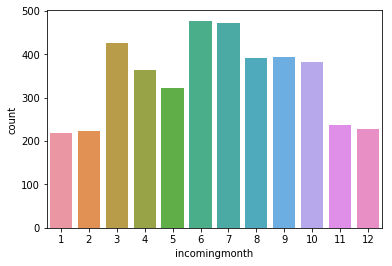

In [141]:
sns.countplot(x="incomingmonth", data = df) 


In [142]:
df['incomingyear'].unique()

array([2009, 2012, 2013, 2015, 2016, 2017, 2018])

In [163]:
adoption = df[(df.movementtype == "Adoption")
                        & (df.incomingyear == 2018)
                       ].groupby(by = ["speciesname", "incomingmonth"], 
                                 as_index = False).count()


In [164]:
adoption

,speciesname,incomingmonth,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,...,source,target,type,value,material,incomingyear,incomingday,incomingdayofweek,incomingdate,isWeekend
0,Cat,1,60,60,60,60,60,58,60,60,...,60,60,60,60,60,60,60,60,60,60
1,Cat,2,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
2,Cat,3,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
3,Cat,4,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,Dog,1,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
5,Dog,2,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
6,Dog,3,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
7,Dog,4,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
8,Ferret,3,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
9,Guinea Pig,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


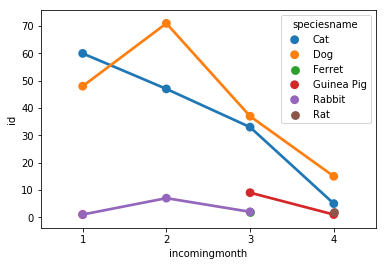

In [165]:
sns.pointplot(x = "incomingmonth", y = "id", data = adoption, hue = "speciesname")
